In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
edu_data=pd.read_csv(r'C:\Users\VIGNESH\Machine Learning\Logistic-Assessment\xAPI-Edu-Data.csv',header=0)

In [3]:
edu_data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [4]:
edu_data.shape

(480, 17)

In [5]:
edu_data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [6]:
#value_counts for getting the total values in each variable column

In [7]:
edu_data['gender'].value_counts()

M    305
F    175
Name: gender, dtype: int64

In [8]:
edu_data['NationalITy'].value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

# Pre processing the data

In [9]:
edu_data_rev=pd.DataFrame.copy(edu_data)

In [10]:
edu_data_rev

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


# Visualizing the features

In [11]:
edu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [12]:
edu_data.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [13]:
#Finding the missing values
edu_data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [14]:
for i in edu_data.columns:
    print({i:edu_data[i].unique()})

{'gender': array(['M', 'F'], dtype=object)}
{'NationalITy': array(['KW', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Palestine',
       'Iraq', 'Lybia'], dtype=object)}
{'PlaceofBirth': array(['KuwaIT', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Iraq',
       'Palestine', 'Lybia'], dtype=object)}
{'StageID': array(['lowerlevel', 'MiddleSchool', 'HighSchool'], dtype=object)}
{'GradeID': array(['G-04', 'G-07', 'G-08', 'G-06', 'G-05', 'G-09', 'G-12', 'G-11',
       'G-10', 'G-02'], dtype=object)}
{'SectionID': array(['A', 'B', 'C'], dtype=object)}
{'Topic': array(['IT', 'Math', 'Arabic', 'Science', 'English', 'Quran', 'Spanish',
       'French', 'History', 'Biology', 'Chemistry', 'Geology'],
      dtype=object)}
{'Semester': array(['F', 'S'], dtype=object)}
{'Relation': array(['Father', 'Mum'], dtype=object)}
{'raisedhands': array([ 15,  20,  10,  30,  40,  42

In [15]:
#Categorical data relationship with raisedhands

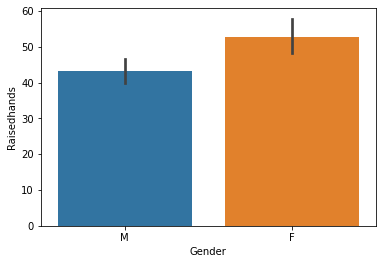

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=edu_data["gender"],y=edu_data["raisedhands"]);
plt.xlabel("Gender")
plt.ylabel("Raisedhands")
plt.xticks()
plt.show()

In [17]:
#females raised more hands than male

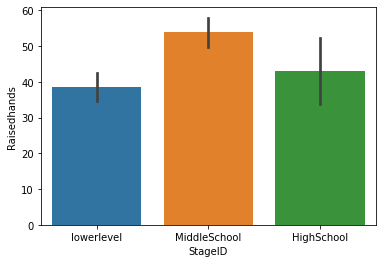

In [18]:
sns.barplot(x=edu_data["StageID"],y=edu_data["raisedhands"]);
plt.xlabel("StageID")
plt.ylabel("Raisedhands")
plt.xticks()
plt.show()

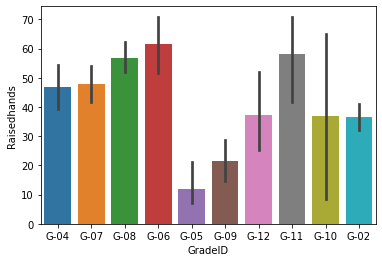

In [19]:
sns.barplot(x=edu_data["GradeID"],y=edu_data["raisedhands"]);
plt.xlabel("GradeID")
plt.ylabel("Raisedhands")
plt.xticks()
plt.show()

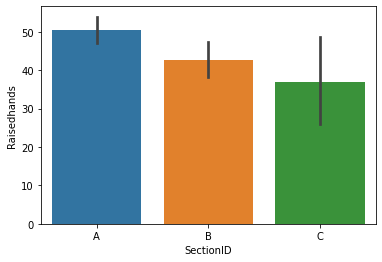

In [20]:
sns.barplot(x=edu_data["SectionID"],y=edu_data["raisedhands"]);
plt.xlabel("SectionID")
plt.ylabel("Raisedhands")
plt.xticks()
plt.show()

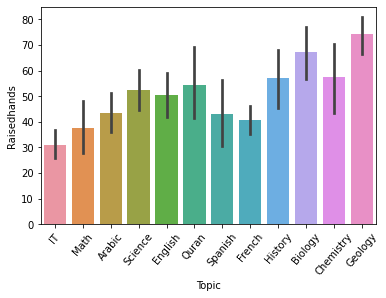

In [21]:
sns.barplot(x=edu_data["Topic"],y=edu_data["raisedhands"]);
plt.xlabel("Topic")
plt.ylabel("Raisedhands")
plt.xticks(rotation=50)
plt.show()

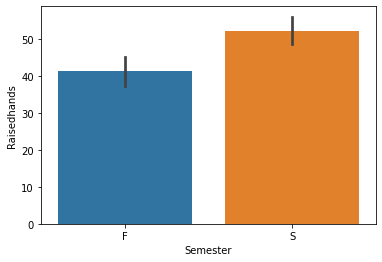

In [22]:
sns.barplot(x=edu_data["Semester"],y=edu_data["raisedhands"]);
plt.xlabel("Semester")
plt.ylabel("Raisedhands")
plt.xticks()
plt.show()

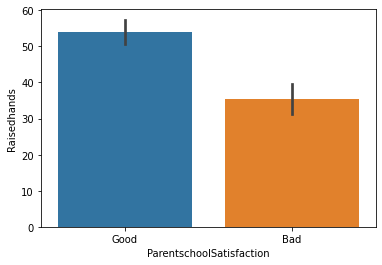

In [23]:
sns.barplot(x=edu_data["ParentschoolSatisfaction"],y=edu_data["raisedhands"]);
plt.xlabel("ParentschoolSatisfaction")
plt.ylabel("Raisedhands")
plt.xticks()
plt.show()

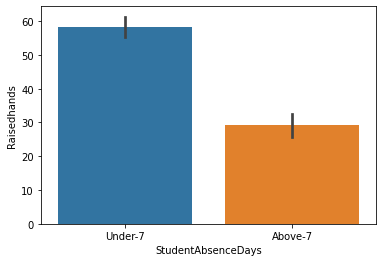

In [24]:
sns.barplot(x=edu_data["StudentAbsenceDays"],y=edu_data["raisedhands"]);
plt.xlabel("StudentAbsenceDays")
plt.ylabel("Raisedhands")
plt.xticks()
plt.show()

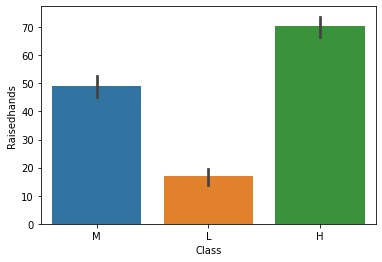

In [25]:
sns.barplot(x=edu_data["Class"],y=edu_data["raisedhands"]);
plt.xlabel("Class")
plt.ylabel("Raisedhands")
plt.xticks()
plt.show()

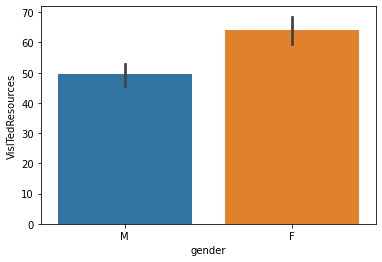

In [26]:
#Categorical data relationship with visitedresources
sns.barplot(x=edu_data["gender"],y=edu_data["VisITedResources"]);
plt.xlabel("gender")
plt.ylabel("VisITedResources")
plt.xticks()
plt.show()

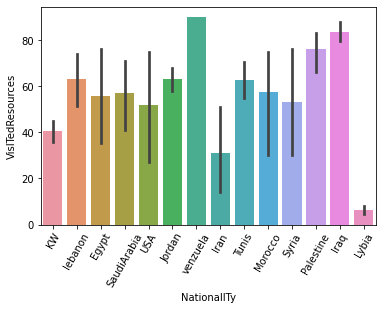

In [27]:
#Categorical data relationship with visitedresources
sns.barplot(x=edu_data["NationalITy"],y=edu_data["VisITedResources"]);
plt.xlabel("NationalITy")
plt.ylabel("VisITedResources")
plt.xticks(rotation=60)
plt.show()

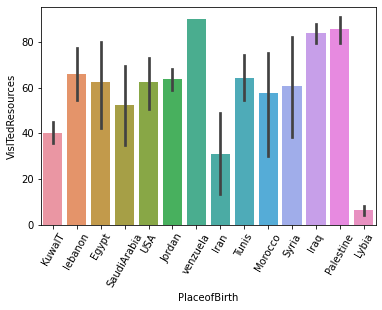

In [28]:
#Categorical data relationship with visitedresources
sns.barplot(x=edu_data["PlaceofBirth"],y=edu_data["VisITedResources"]);
plt.xlabel("PlaceofBirth")
plt.ylabel("VisITedResources")
plt.xticks(rotation=60)
plt.show()

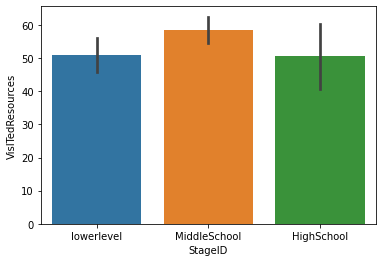

In [29]:
#Categorical data relationship with visitedresources
sns.barplot(x=edu_data["StageID"],y=edu_data["VisITedResources"]);
plt.xlabel("StageID")
plt.ylabel("VisITedResources")
plt.xticks()
plt.show()

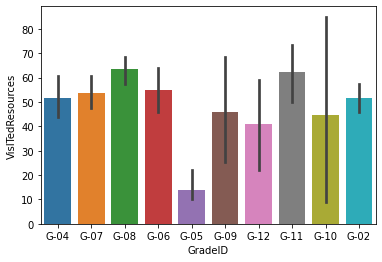

In [30]:
#Categorical data relationship with visitedresources
sns.barplot(x=edu_data["GradeID"],y=edu_data["VisITedResources"]);
plt.xlabel("GradeID")
plt.ylabel("VisITedResources")
plt.xticks()
plt.show()

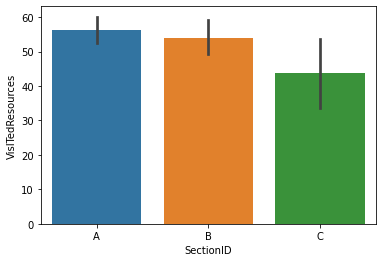

In [31]:
sns.barplot(x=edu_data["SectionID"],y=edu_data["VisITedResources"]);
plt.xlabel("SectionID")
plt.ylabel("VisITedResources")
plt.xticks()
plt.show()

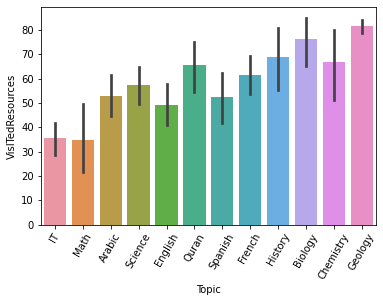

In [32]:
sns.barplot(x=edu_data["Topic"],y=edu_data["VisITedResources"]);
plt.xlabel("Topic")
plt.ylabel("VisITedResources")
plt.xticks(rotation=60)
plt.show()

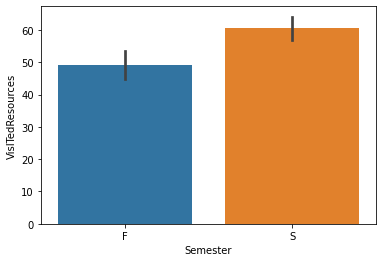

In [33]:
sns.barplot(x=edu_data["Semester"],y=edu_data["VisITedResources"]);
plt.xlabel("Semester")
plt.ylabel("VisITedResources")
plt.xticks()
plt.show()

# pre processing the data

In [34]:
colname=[]
for x in edu_data.columns:
    if edu_data[x].dtypes=='object':
        colname.append(x)
colname        

['gender',
 'NationalITy',
 'PlaceofBirth',
 'StageID',
 'GradeID',
 'SectionID',
 'Topic',
 'Semester',
 'Relation',
 'ParentAnsweringSurvey',
 'ParentschoolSatisfaction',
 'StudentAbsenceDays',
 'Class']

In [35]:
#converting the categorical data into numeric using labelencoder
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname:
    edu_data[x]=le.fit_transform(edu_data[x])
    
    
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature gender
mapping {'F': 0, 'M': 1}
Feature NationalITy
mapping {'Egypt': 0, 'Iran': 1, 'Iraq': 2, 'Jordan': 3, 'KW': 4, 'Lybia': 5, 'Morocco': 6, 'Palestine': 7, 'SaudiArabia': 8, 'Syria': 9, 'Tunis': 10, 'USA': 11, 'lebanon': 12, 'venzuela': 13}
Feature PlaceofBirth
mapping {'Egypt': 0, 'Iran': 1, 'Iraq': 2, 'Jordan': 3, 'KuwaIT': 4, 'Lybia': 5, 'Morocco': 6, 'Palestine': 7, 'SaudiArabia': 8, 'Syria': 9, 'Tunis': 10, 'USA': 11, 'lebanon': 12, 'venzuela': 13}
Feature StageID
mapping {'HighSchool': 0, 'MiddleSchool': 1, 'lowerlevel': 2}
Feature GradeID
mapping {'G-02': 0, 'G-04': 1, 'G-05': 2, 'G-06': 3, 'G-07': 4, 'G-08': 5, 'G-09': 6, 'G-10': 7, 'G-11': 8, 'G-12': 9}
Feature SectionID
mapping {'A': 0, 'B': 1, 'C': 2}
Feature Topic
mapping {'Arabic': 0, 'Biology': 1, 'Chemistry': 2, 'English': 3, 'French': 4, 'Geology': 5, 'History': 6, 'IT': 7, 'Math': 8, 'Quran': 9, 'Science': 10, 'Spanish': 11}
Feature Semester
mapping {'F': 0, 'S': 1}
Feature Relation
mapping {'Father': 0, 'Mu

In [36]:
edu_data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


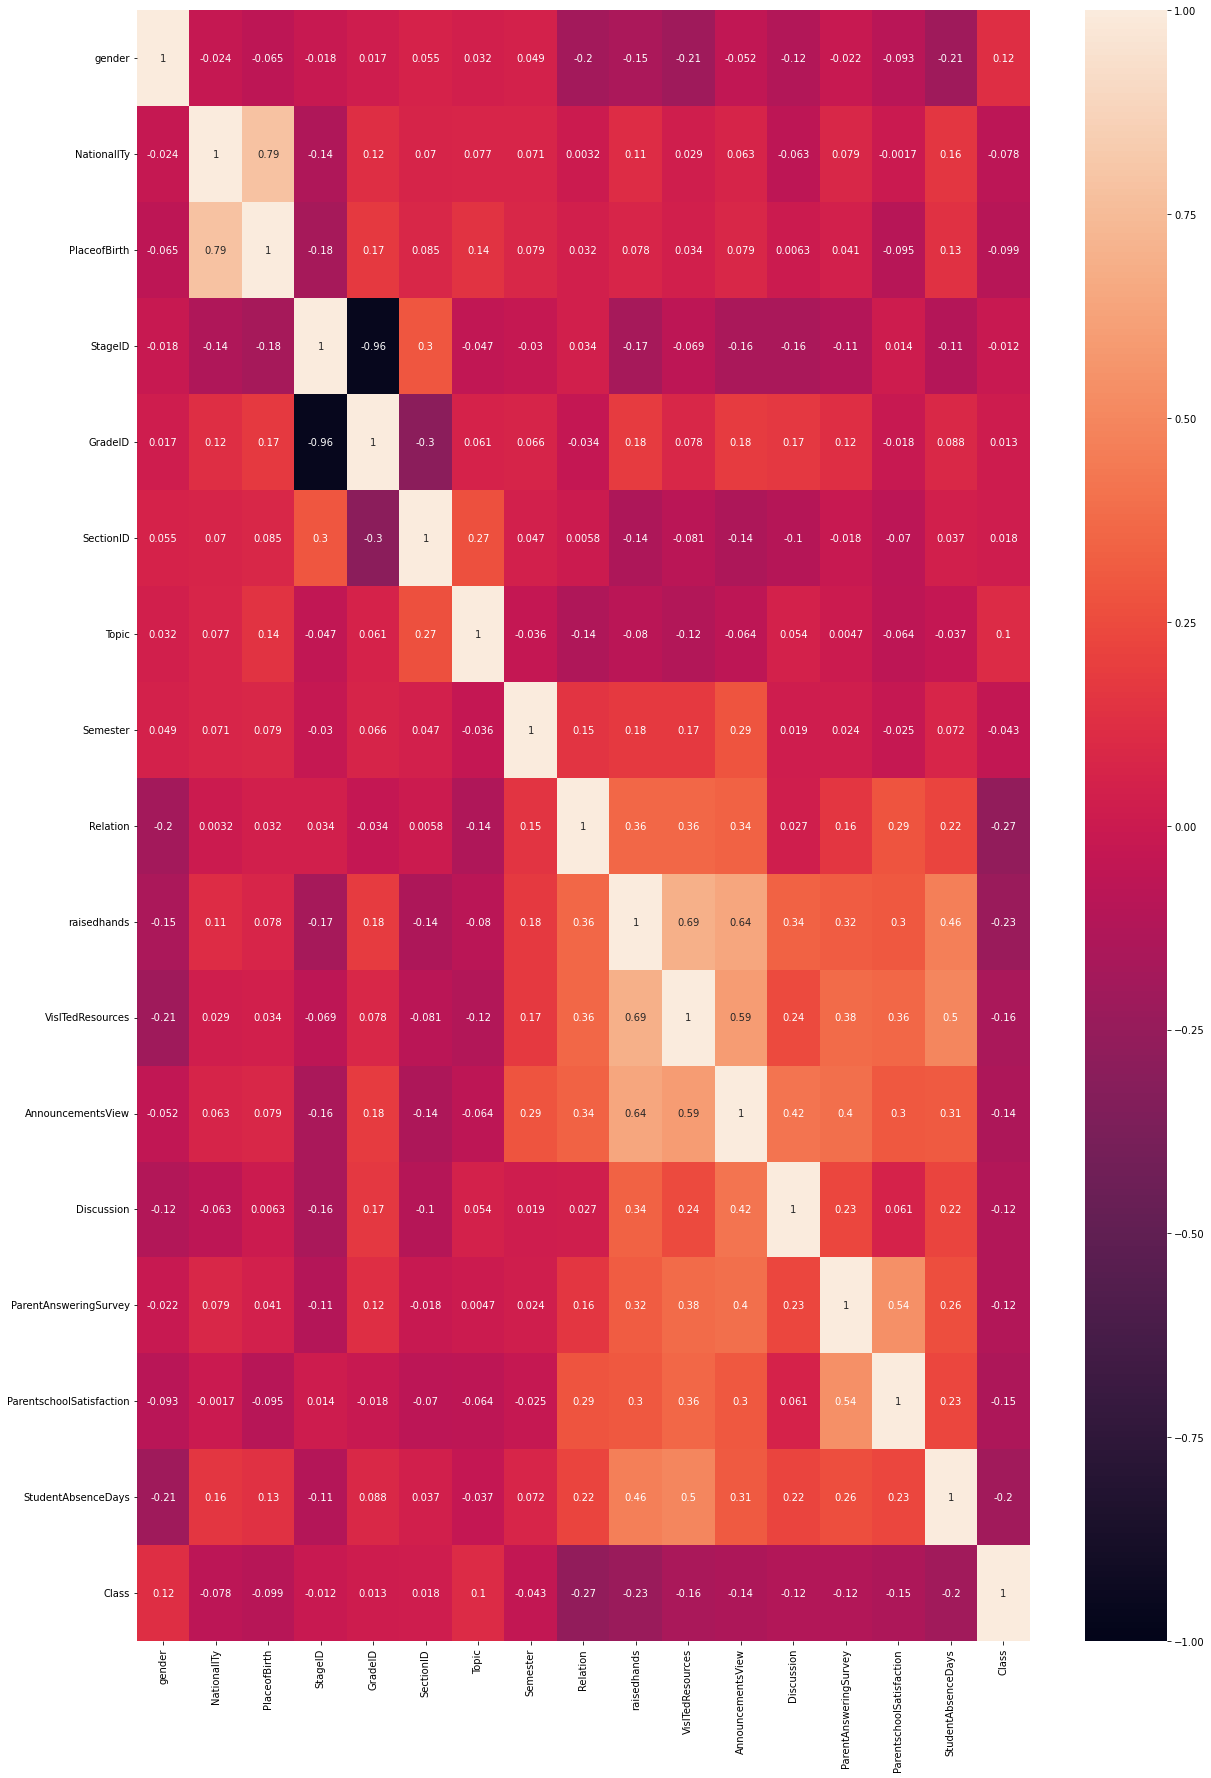

In [37]:
#heatmap
corr_df=edu_data.corr()
corr_df

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,30))
sns.heatmap(corr_df,vmin=-1.0,vmax=1.0,annot=True)



plt.show()

In [38]:
#Create X and Y

In [40]:
X=edu_data.values[:,0:-1]
Y=edu_data.values[:,-1]

In [41]:
X.shape

(480, 16)

In [42]:
Y.shape

(480,)

In [43]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [44]:
print(X)

[[ 0.7574764  -0.1402013  -0.15155299 ...  0.8819171   0.80239368
   0.81295735]
 [ 0.7574764  -0.1402013  -0.15155299 ...  0.8819171   0.80239368
   0.81295735]
 [ 0.7574764  -0.1402013  -0.15155299 ... -1.13389342 -1.24627103
  -1.23007683]
 ...
 [-1.32017315 -0.54560266 -0.53241913 ... -1.13389342 -1.24627103
   0.81295735]
 [-1.32017315 -0.54560266 -0.53241913 ... -1.13389342 -1.24627103
  -1.23007683]
 [-1.32017315 -0.54560266 -0.53241913 ... -1.13389342 -1.24627103
  -1.23007683]]


In [45]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [46]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(384, 16)
(384,)
(96, 16)
(96,)


In [47]:
#Building the logistics model

In [48]:
from sklearn.linear_model import LogisticRegression
#create a model object
classifier = LogisticRegression()

#train the model object
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(Y_pred)
print(list(zip(Y_test,Y_pred)))

[0 2 2 1 2 0 0 0 2 1 2 2 2 2 2 2 1 0 2 2 1 2 1 2 2 1 0 0 2 0 2 0 1 2 2 1 2
 2 1 0 2 1 2 1 2 2 0 2 2 0 2 1 2 2 2 0 0 1 2 0 0 1 0 2 2 2 2 0 1 0 2 1 2 2
 2 2 1 1 2 0 1 0 1 1 2 0 1 0 0 2 0 1 2 2 0 0]
[(2, 0), (2, 2), (2, 2), (1, 1), (2, 2), (0, 0), (0, 0), (2, 0), (2, 2), (1, 1), (2, 2), (1, 2), (2, 2), (2, 2), (2, 2), (2, 2), (1, 1), (0, 0), (2, 2), (2, 2), (1, 1), (2, 2), (2, 1), (2, 2), (0, 2), (1, 1), (2, 0), (0, 0), (2, 2), (0, 0), (0, 2), (0, 0), (1, 1), (2, 2), (0, 2), (1, 1), (2, 2), (2, 2), (1, 1), (0, 0), (0, 2), (1, 1), (2, 2), (1, 1), (2, 2), (0, 2), (2, 0), (2, 2), (2, 2), (2, 0), (2, 2), (1, 1), (2, 2), (2, 2), (2, 2), (2, 0), (0, 0), (1, 1), (2, 2), (0, 0), (0, 0), (1, 1), (2, 0), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (2, 1), (0, 0), (2, 2), (1, 1), (2, 2), (2, 2), (2, 2), (0, 2), (1, 1), (1, 1), (2, 2), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (2, 2), (0, 0), (2, 1), (2, 0), (0, 0), (1, 2), (2, 0), (1, 1), (2, 2), (1, 2), (0, 0), (2, 0)]


In [49]:
print(list(zip(edu_data.columns[:-1],classifier.coef_.ravel())))  #ravel is used to flaten the array
print(classifier.intercept_)
#classifier.coef_

[('gender', -0.2337410589955117), ('NationalITy', -0.20091010660933886), ('PlaceofBirth', 0.296399016441806), ('StageID', -0.2694959574288292), ('GradeID', -0.4905695659204392), ('SectionID', 0.08291724104617881), ('Topic', -0.1433252541175718), ('Semester', 0.028879852261355702), ('Relation', 0.4297804218568341), ('raisedhands', 0.8115896391978626), ('VisITedResources', 0.4829869024799287), ('AnnouncementsView', 0.3215849391954579), ('Discussion', 0.4041082270446629), ('ParentAnsweringSurvey', 0.3461820016754387), ('ParentschoolSatisfaction', 0.23697169157984901), ('StudentAbsenceDays', 1.1468253986382155)]
[-0.18937794 -1.40606545  1.59544339]


In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[17  0  6]
 [ 0 20  3]
 [10  3 37]]
Classification report:
              precision    recall  f1-score   support

           0       0.63      0.74      0.68        23
           1       0.87      0.87      0.87        23
           2       0.80      0.74      0.77        50

    accuracy                           0.77        96
   macro avg       0.77      0.78      0.77        96
weighted avg       0.78      0.77      0.77        96

Accuracy of the model:  0.7708333333333334
